In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
content = pd.read_csv("D:/DATA SCIENCE ZONE/Projects/Accenture_social_buzz_data_analysis/social_buzz_project_files/social_buzz_datasets/Content.csv",index_col=0)
reactions = pd.read_csv("D:/DATA SCIENCE ZONE/Projects/Accenture_social_buzz_data_analysis/social_buzz_project_files/social_buzz_datasets/Reactions.csv", index_col=0)
reaction_types = pd.read_csv("D:/DATA SCIENCE ZONE/Projects/Accenture_social_buzz_data_analysis/social_buzz_project_files/social_buzz_datasets/ReactionTypes.csv",index_col=0)

In [5]:
print(content.shape)
print(reactions.shape)
print(reaction_types.shape)

(1000, 5)
(25553, 4)
(16, 3)


In [6]:
content.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [7]:
reactions.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [8]:
reaction_types.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


# Dataset 1 : Content

In [9]:
content.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [10]:
content.dtypes

Content ID    object
User ID       object
Type          object
Category      object
URL           object
dtype: object

In [11]:
# Renaming the column names for my convinient
content.rename(columns = {"User ID":"User_ID"}, inplace= True)
content.rename(columns = {"Content ID":"Content_ID"}, inplace= True)
content.rename(columns = {"Type": "Content_Type"}, inplace = True)

In [12]:
# changing category to lowercase
content.Category = content.Category.str.lower()

In [13]:
content.Category.unique()

array(['studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'veganism', 'animals', 'culture',
       '"culture"', '"studying"', '"animals"', '"soccer"', '"dogs"',
       '"tennis"', '"food"', '"technology"', '"cooking"',
       '"public speaking"', '"veganism"', '"science"'], dtype=object)

In [14]:
content.loc[content.Category.str.contains('"')]

,Content_ID,User_ID,Content_Type,Category,URL
50,2d949603-6676-4402-900b-2c2c78315ea0,4baf648a-0ad5-412d-8250-5a0ff9289fbf,audio,"""culture""",NaN
100,c8b044a9-8427-4b41-bc61-7b549ab1626c,64b33556-9ecf-4ebc-8b4c-f829ab1a4881,photo,"""studying""",NaN
150,5651450a-d330-46e6-bac9-c7c7e7defaf2,bf721d00-4fa1-44b1-834f-4730cd51aefa,photo,"""animals""",NaN
200,48a824bf-e495-4333-8acf-c800947ec2cd,69fcad9e-45a9-4189-b7e1-96b26c57c542,audio,"""soccer""",NaN
250,78461336-26e2-4d0c-ab9a-fefbe419a8dd,3205ad12-726a-4b65-a15a-1a899a9d310b,video,"""dogs""",NaN
300,693b5f91-52b1-4464-916c-91adccbec996,3663e3e6-3d5c-4ed9-a6af-1e680ec5f34b,photo,"""culture""",NaN
400,93081b1a-4446-438a-a0d7-fbcedc3c992d,3efc3621-873a-4b80-a0cb-27e531d600be,GIF,"""soccer""",NaN
450,bde82663-7be3-453d-afc2-539202df27c3,7adafb3c-7c7c-492b-be5b-5ddd9ff1316a,video,"""tennis""",NaN
500,6380e982-07ac-4d21-bd23-cec0bcfa1ff9,1582dac6-ebec-43ed-a34a-1a202ca72627,photo,"""soccer""",NaN
550,e4487829-621f-4265-8665-42a4c0610745,6fd58dea-315a-4ab2-8023-424a6ff455cd,audio,"""food""",NaN


In [15]:
# removing the unwanted quotation in categories
content.Category = content.Category.str.strip('"')

In [16]:
content.loc[content.Category.str.contains('"')]

,Content_ID,User_ID,Content_Type,Category,URL


<Axes: >

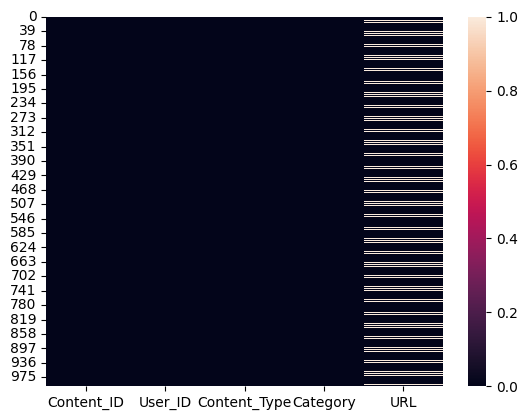

In [17]:
# Visualizing the Null Values in the Dataset
sns.heatmap(content.isnull())

In [18]:
content.URL.isnull().sum()

199

In [19]:
print(f" There are {round(content.URL.isnull().sum()/ content.shape[0] * 100,3)}% null values in URL Column ")

 There are 19.9% null values in URL Column 


we can remove the url column in content dataset because we can't impute that column and the column is not mandatory

In [20]:
content.drop(columns = "URL", inplace= True)

In [21]:
content.drop(columns = "User_ID", inplace= True)

we don't need the User_ID for our analysis, so we dropped that

In [22]:
#Checking for duplicates in Contents
content.Content_ID.duplicated().sum()

0

there is no duplicates in the Content IDs

In [23]:
content.dtypes

Content_ID      object
Content_Type    object
Category        object
dtype: object

In [24]:
content.head()

,Content_ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


# Dataset 2 - Reactions

In [25]:
reactions.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [26]:
# Renaming the columns 
reactions.rename(columns = {"User ID":"User_ID"}, inplace= True)
reactions.rename(columns = {"Content ID":"Content_ID"}, inplace= True)
reactions.rename(columns = {"Type": "Reaction_Type"}, inplace = True)

<Axes: >

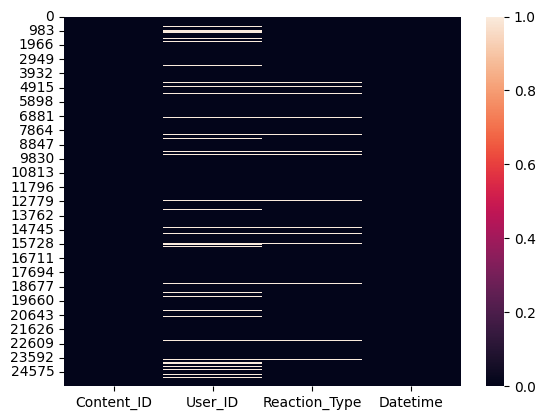

In [27]:
# Checking for Null Values by Visualizing
sns.heatmap(reactions.isnull())

there are null values in userID and type

In [28]:
reactions.User_ID.isnull().sum()

3019

In [29]:
# Finding the percentage of the  Missing Values in user id
missing_in_user_id_reactions_ds = (reactions.User_ID.isnull().sum()/reactions.shape[0])*100
print(f"there are {round(missing_in_user_id_reactions_ds,2)}% of null values in the userID")

there are 11.81% of null values in the userID


there are 11% missing values in the userID so we can remove the entire column because we cant impute the user id and that column is not important

In [30]:
reactions.drop(columns= "User_ID", inplace=True)

In [31]:
# Finding Missing Values in Reaction_Type
missing_in_Type_reactions_ds = (reactions.Reaction_Type.isnull().sum()/reactions.shape[0])*100
print(f"there are {round(missing_in_Type_reactions_ds,2)}% of null values in the Type")

there are 3.84% of null values in the Type


there are only 3 % of missing values in the type column, so we can drop the rows with null values 

In [32]:
#Droping Null Values
reactions.dropna(subset="Reaction_Type", inplace=True)
# Reset the index 
reactions.reset_index(drop= True, inplace= True) 

In [33]:
reactions.head()

,Content_ID,Reaction_Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [34]:
# Datetime format conversion from str
reactions.Datetime = pd.to_datetime(reactions.Datetime)

In [35]:
reactions.head()

,Content_ID,Reaction_Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


# Dataset 3 - Reaction_types

In [36]:
reaction_types.dtypes

Type         object
Sentiment    object
Score         int64
dtype: object

In [37]:
reaction_types.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [38]:
reaction_types.shape

(16, 3)

In [39]:
# Renaming the column
reaction_types.rename(columns={'Type':'Reaction_Type'},inplace=True)

In [40]:
reaction_types

,Reaction_Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


# Joining all the 3 Tables

In [41]:
reactions.head(2)

,Content_ID,Reaction_Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51


In [42]:
content.head(2)

,Content_ID,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating


In [43]:
reaction_types.head(2)

,Reaction_Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70


In [44]:
#Merging first 2 tables by keeping the reactions table as base 
reactions_content_merge = reactions.merge(content, on = "Content_ID")

In [45]:
reactions_content_merge

,Content_ID,Reaction_Type,Datetime,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [46]:
# Merging the the 3rd table
top_performers = reactions_content_merge.merge(reaction_types, on = 'Reaction_Type')

In [47]:
#Cleaned table after joining the 3 tables
top_performers

,Content_ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,negative,12


In [48]:
# Finding the top 5 popular categories
top_5_category = top_performers.groupby("Category").Score.sum().sort_values(ascending= False).to_frame().head(5)
top_5_category

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [49]:
# Task 3 csv file
top_5_category.to_csv('D:/DATA SCIENCE ZONE/Projects/Accenture_social_buzz_data_analysis/social_buzz_project_files/social_buzz_cleaned_dataset/client_data.csv')

In [50]:

pd.read_csv('D:/DATA SCIENCE ZONE/Projects/Accenture_social_buzz_data_analysis/social_buzz_project_files/social_buzz_cleaned_dataset/client_data.csv', index_col= 0)

,Score
Category,
animals,74965
science,71168
healthy eating,69339
technology,68738
food,66676


In [51]:
# cleaned datset to csv to visualizing the insights
top_performers.to_csv('D:/DATA SCIENCE ZONE/Projects/Accenture_social_buzz_data_analysis/social_buzz_project_files/social_buzz_cleaned_dataset/social_buzz_cleaned_data.csv')